In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aquaponicsprojectdatasets/Ambient Parameters Station 2 SXC_03-28-22.csv
/kaggle/input/aquaponicsprojectdatasets/Aquaponics Water Quality Tests Data - Log 01_01_2021 - 12_31_2021.csv
/kaggle/input/aquaponicsprojectdatasets/Water Quality SXH-ORP Remotely collected_03-28-22.csv
/kaggle/input/aquaponicsprojectdatasets/Aquaponics Water Quality Tests Data - log 03_16_2020 - 12_31_2020.csv
/kaggle/input/aquaponicsprojectdatasets/Ambient Parameters Station 1 SXE_03-28-22.csv
/kaggle/input/aquaponicsprojectdatasets/Aquaponics Water Quality Tests Data - Log 01_01_2022 - 12_31_2022.csv


In [2]:
# Path of the file to read
my_filepath = "/kaggle/input/aquaponicsprojectdatasets/Aquaponics Water Quality Tests Data - Log 01_01_2022 - 12_31_2022.csv"

In [3]:
#read the file into a variable my_aquaponics_data
my_aquaponics = pd.read_csv(my_filepath)

In [4]:
#parse dates 
from datetime import datetime, timezone
my_aquaponics['Date:'] = pd.to_datetime(my_aquaponics['Date:'], format='%m/%d/%Y')
my_aquaponics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 15 columns):
 #   Column                                                          Non-Null Count  Dtype         
---  ------                                                          --------------  -----         
 0   Recorded by Remy Romo-Valdez (x = not recorder; 0 = recorder):  81 non-null     object        
 1   Javier Mollinedo (x = not recorder; 0 = recorder):              81 non-null     object        
 2   Ellison Montgomery (x = not recorder; 0 = recorder):            81 non-null     object        
 3   Day:                                                            89 non-null     object        
 4   Date:                                                           89 non-null     datetime64[ns]
 5   Time:                                                           83 non-null     object        
 6   pH:                                                             83 non-null     float64     

In [5]:
# Remove NaN values
my_aquaponics= my_aquaponics.dropna()

# Isolate useful columns for future referencing 
my_aquaponics.drop(my_aquaponics.columns[[0,1,2,3,14]],axis=1, inplace=True)

print(my_aquaponics.head())


        Date:    Time:  pH:  Ammonia (ppm):  Nitrite (ppm):  Nitrate (ppm):  \
14 2022-01-15    10:00  7.6            0.00             0.0            40.0   
15 2022-01-16    11:00  7.6            0.00             0.0            40.0   
16 2022-01-17     9:00  7.6            0.00             0.0            60.0   
17 2022-01-18  9:53 AM  7.6            0.25             0.0            20.0   
18 2022-01-19  9:48 AM  7.6            0.25             0.0            40.0   

   Water Temp. (°F):  Room Temp.(°F):  Humidity (%)  Dissolved Oxygen (ppm)  
14              76.1             90.0          45.0                     7.6  
15                76             83.0          40.0                     7.3  
16              72.5             80.0          65.0                     8.1  
17              72.2             83.0          64.0                     8.1  
18              72.2             83.0          61.0                     7.8  


<AxesSubplot:xlabel='Date:', ylabel='pH:'>

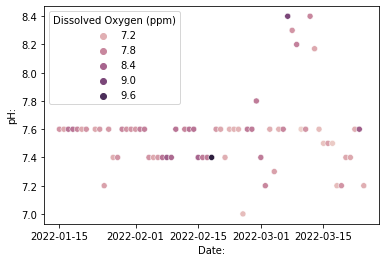

In [6]:
# Scatter plot showing the relationship between 'Date:', 'pH:', and 'Dissolved Oxygen (ppm)'
import matplotlib.pyplot as plt
%matplotlib inline
sns.scatterplot(x =my_aquaponics['Date:'], y =my_aquaponics['pH:'], hue =my_aquaponics['Dissolved Oxygen (ppm)'])


<AxesSubplot:xlabel='pH:', ylabel='Dissolved Oxygen (ppm)'>

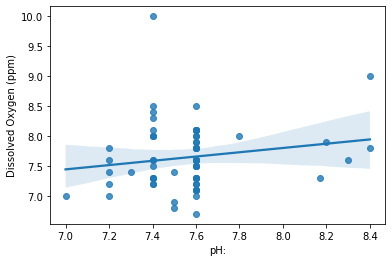

In [7]:
# Scatter plot w/ regression line showing the relationship between 'pH:' and 'Dissolved Oxygen (ppm)'
sns.regplot(x=my_aquaponics['pH:'],y=my_aquaponics['Dissolved Oxygen (ppm)'])

# There is a slight correlation between 'pH:' and 'Dissolved Oxygen (ppm)'